### Hate Speech detection using Transformers (Deep Learning)

#### This Project is actually about the concept of "hate speech", which we frequently encounter today and witness on social media. With the invention of the Internet, people all over the world can communicate. Although some people like the photos , videos and ideas we share , some people also criticize heavily . In this project, I will evaluate many positive or negative tweets shared on Twitter, a social media platform, and create a model through this evaluation. Although this is a project topic , I would like to remind you how easy it is to criticize people and break the hearts of people we do not know today . Before we criticize, we should consider how other people might feel. A better world is possible <3.

## Introduction to Project

<img src="hatespc.jpg" alt="Alternative text" />

## Problem Statement

#### The term hate speech is understood as any type of verbal, written or behavioural communication that attacks or uses derogatory or discriminatory language against a person or group based on what they are, in other words, based on their religion, ethnicity, nationality, race, colour, ancestry, sex or another identity factor. In this problem, We will design a hate speech detection model with Machine Learning and Python.

#### Hate Speech Detection is generally a task of sentiment classification. So for training, a model that can classify hate speech from a certain piece of text can be achieved by training it on a data that is generally used to classify sentiments. So for the task of hate speech detection model, We will use the Twitter tweets to identify tweets containing  Hate speech.

## Examine and Get to Know the Dataset

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import string
import random
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("train_E6oV3lV.csv")

In [4]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:

df.shape

(31962, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [7]:
df.isna().sum()

id       0
label    0
tweet    0
dtype: int64

In [8]:
free_s = 0
hate_s = 0

for elm in df["label"]:
    if elm == 0:
        free_s += 1
    else:
        hate_s += 1


print("free : {}".format(free_s))
print("hate : {}".format(hate_s))

free : 29720
hate : 2242


Free Speech Percentage : %92.98542018647143
Hate Speech Percentage : %7.014579813528565


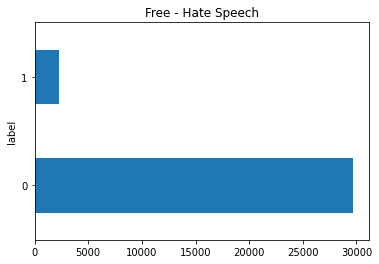

In [9]:
df["label"].value_counts().plot.barh().set_title("Free - Hate Speech")

print("Free Speech Percentage : %{}".format((free_s / df["label"].size) * 100))
print("Hate Speech Percentage : %{}".format((hate_s / df["label"].size) * 100))

#### As we have seen above , the dataset does not contain any blank information . When we examine the data set, we can see that most of the data it contains comes from "Free Speech". When we examine the tweets contained in the dataset, we see that a preprocessing is required, too many unnecessary characters etc. We can easily see what it contains.

## *** Preprocessing ***

<img src="data_pre.png" alt="Alternative text" />

In [10]:
df["tweet"].iloc[0]

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'

In [11]:
#### Cleaning the Text

##### In this part , I removed the characters that placed in the tweets and apply the "lowercase" method . I used regex operation to remove special characters like "#,@" and unnecessary blanks.

In [12]:
def preprocess_tweet(tweet):
    tweet = tweet.lower()
    tweet = ''.join([char for char in tweet if char not in string.punctuation])
    tweet = re.sub(r'http\S+|www\S+|@[^\s]+', '', tweet)
    tweet = re.sub(r'\s+', ' ', tweet).strip()
    tweet = ' '.join(char for char in tweet.split() if char.isalnum())
    return tweet

df["cleaned_tweets"] = df["tweet"].apply(preprocess_tweet)

for number in range(10):
    x = random.randint(1,1000)
    print("random number {} : {}".format(x,df["cleaned_tweets"].iloc[x]))

random number 539 : user attempt at czech fury only for croatia to score their second
random number 198 : user user if they want reelection money ksleg
random number 753 : nyc in seven days newyork newyorkcity travel bigapple
random number 837 : have a nice life im done trying to be in it lovequotes
random number 555 : excited na me
random number 897 : python27 and concurrency are not best friends all the code i have 2 restructure to get concurrency with celery developers python
random number 337 : aww yeah its all good bing bong bing bong
random number 797 : model i love u take with u all the time in
random number 132 : i need to find a way to spend my time so you are not always on my mind me boy guy
random number 844 : great way to spend a saturday relaxation positivevibes california cakesbytheocean
